In [21]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')
import nltk
import seaborn as sbn
from textblob import TextBlob
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('filename.csv')

In [3]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en,[],[],[],0,0,0,[],[],https://twitter.com/TomasLiptai/status/1630366...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,The Russia HAARP which could destroy USA in on...,en,[],['https://reality-choice.org/177/sura-the-russ...,[],0,0,0,[],[],https://twitter.com/paperfloure/status/1630366...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,Putin gives Steven Seagal Russia&amp;#8217;s O...,en,[],['https://thehill.com/blogs/in-the-know/387609...,[],0,0,0,[],[],https://twitter.com/katetbar1/status/163036622...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en,[],[],[],0,0,0,[],[],https://twitter.com/JlhRDHMOM/status/163036622...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en,[],[],[],0,0,0,[],[],https://twitter.com/PhemiKali/status/163036622...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [4]:
data.sample(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
4474,1630349095565918209,1630349095565918209,2023-02-27 23:28:09 UTC,2023-02-27,23:28:09,0,2325694279,johnminehan1,John Minehan,NaN,https://t.co/tknlDXZZso Interesting . . . . ...,en,[],['https://audioboom.com/posts/8253956-londiniu...,[],0,0,0,[],[],https://twitter.com/JohnMinehan1/status/163034...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8098,1630336981581348867,1630330690469330946,2023-02-27 22:40:01 UTC,2023-02-27,22:40:01,0,453187230,fecak,Dave Fecak,NaN,@NateSilver538 No. The chances of a lab leak w...,en,[],[],[],8,0,17,[],[],https://twitter.com/fecak/status/1630336981581...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NateSilver538', 'name': 'Nat...",NaN,NaN,NaN,NaN
8955,1630334368328691714,1630334343465017345,2023-02-27 22:29:38 UTC,2023-02-27,22:29:38,0,1286564974811328512,thecirculars_22,💙,NaN,@FiorellaIsabelF Why your talking points from ...,en,[],[],[],0,0,0,[],[],https://twitter.com/TheCirculars_22/status/163...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'FiorellaIsabelF', 'name': 'F...",NaN,NaN,NaN,NaN
23,1630366137904152576,1630326029284786176,2023-02-28 00:35:52 UTC,2023-02-28,00:35:52,0,1411508372210290688,nafyochanan,Yochanan,NaN,@TiggerTwo4 The complicated thing is: 1. What ...,en,[],[],[],0,0,0,[],[],https://twitter.com/NafYochanan/status/1630366...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TiggerTwo4', 'name': 'Tigger...",NaN,NaN,NaN,NaN
4567,1630348760629772289,1630207278820257793,2023-02-27 23:26:49 UTC,2023-02-27,23:26:49,0,1599239777852825600,tammysu69379617,tammy sullivan,NaN,@colonelhomsi China and Russia will eat our lu...,en,[],[],[],0,0,0,[],[],https://twitter.com/tammysu69379617/status/163...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'colonelhomsi', 'name': 'Geo_...",NaN,NaN,NaN,NaN


In [5]:
data = data[['username', 'tweet', 'language', 'name']]

In [6]:
data.columns

Index(['username', 'tweet', 'language', 'name'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  10014 non-null  object
 1   tweet     10014 non-null  object
 2   language  10014 non-null  object
 3   name      10014 non-null  object
dtypes: object(4)
memory usage: 313.1+ KB


In [8]:
data.isnull().sum()

username    0
tweet       0
language    0
name        0
dtype: int64

In [9]:
data.describe(include = object)

,username,tweet,language,name
count,10014,10014,10014,10014
unique,7569,9971,37,7440
top,wrlmyxe7zer5ckr,@POTUS President Biden pls tell ur Obama to co...,en,キッチン大好き。
freq,24,16,8858,24


In [10]:
data.language.value_counts()

en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: language, dtype: int64

In [11]:
data.name.value_counts()

キッチン大好き。                                  24
Emanuele Trevisi                          21
Will                                      21
Michael O'Neill Accountable Government    18
Fatima Mapesos ☯️                         17
                                          ..
Caleigh Fisher                             1
Old Bones                                  1
PATHSELECTOR🐀                              1
Ronnie G                                   1
Gody van Dillen 🇺🇦 🇳🇱                      1
Name: name, Length: 7440, dtype: int64

## Sentiment Analysis

In [13]:
data.tweet[3]

'@MainelifeR @BaddCompani It’s ALWAYS PROJECTION or Russia with him!!!!!'

In [14]:
def clean_text(text): 
    text = str(text).lower()    ## metindeki harfleri kucuk harfe çevirir.
    text = re.sub('\[.*?\]', '', text)   ## metindeki url ya da emoji gibi şeyleri kaldırır.
    text = re.sub('<.*?>+', '', text)    ## Metindeki HTML etiketlerini kaldırır.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  ## Metindeki noktalama işaretlerini kaldırır.
    text = re.sub('\n', '', text)    ## Metindeki satır sonlarını kaldırır.
    text = re.sub('\w*\d\w*', '', text)   ## Metindeki içinde sayı olan kelimeleri kaldırır.
    
    pr = PorterStemmer()
    words = TextBlob(text).words
    text = [pr.stem(word) for word in words]
    text = ' '.join(text)
    return text
    ## Metni TextBlob sınıfına geçirerek kelimelerine ayırıyoruz. TextBlob(text) ifadesi, verilen metni bir TextBlob nesnesine dönüştürürken, 
    # .words özelliği metindeki kelimeleri bir liste olarak döndürür.
    ## Her bir kelime için döngü oluşturarak kök haline getirme işlemini gerçekleştiririz. Burada pr.stem(word) ifadesi, 
    # kök haline getirilmiş bir kelime döndürmek için pr adında bir stemmer kullanır. 
    

In [15]:
data["tweet"] = data["tweet"].apply(clean_text)

In [16]:
data.tweet[3]

'mainelif baddcompani it ’ s alway project or russia with him'

## stopwords

In [19]:
def wordcloud(data, bgcolor):
    plt.figure(figsize = (10, 10))
    #mask = np.array(Image.open("heart.png"))
    wc = WordCloud(background_color = bgcolor, stopwords = STOPWORDS)   
    wc.generate(' '.join(data)) # butun mesajları birleştirip tek bir text haline getirir.
    plt.imshow(wc)
    plt.axis("off")

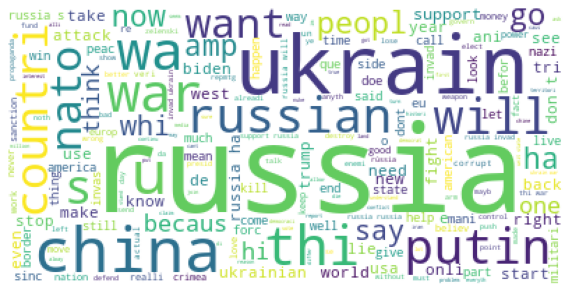

In [22]:
wordcloud(data['tweet'], "white")

In [23]:
def get_sentiment_score(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

In [24]:
data["Positive"] = data["tweet"].apply(lambda x: 1 if get_sentiment_score(x) > 0 else 0)
data["Negative"] = data["tweet"].apply(lambda x: 1 if get_sentiment_score(x) < 0 else 0)
data["Neutral"] = data["tweet"].apply(lambda x: 1 if get_sentiment_score(x) == 0 else 0)

In [25]:
data.head()

,username,tweet,language,name,Positive,Negative,Neutral
0,tomasliptai,nazijaeg derwen russia is a place where satan ...,en,Tomas Liptai,0,0,1
1,paperfloure,the russia haarp which could destroy usa in on...,en,Smell the roses,0,1,0
2,katetbar1,putin give steven seagal order of friendship,en,@etak,0,0,1
3,jlhrdhmom,mainelif baddcompani it ’ s alway project or r...,en,JLHrdh,0,0,1
4,phemikali,pottingpink mfarussia modrussia milhistrf muze...,en,rolarkcybersecurity,0,1,0


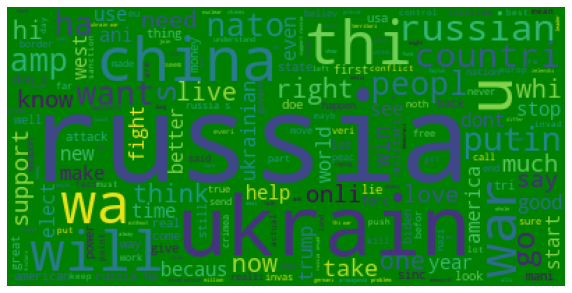

In [27]:
## positive
positive = data[data['Positive'] == 1] 
wordcloud(positive.tweet, 'green')

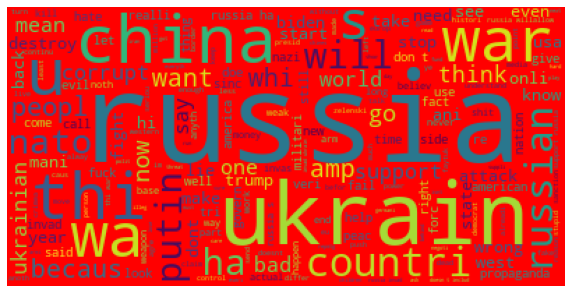

In [28]:
## negative
positive = data[data['Negative'] == 1] 
wordcloud(positive.tweet, 'red')

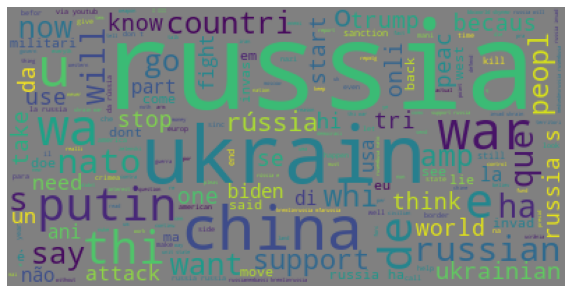

In [30]:
## neutral
positive = data[data['Neutral'] == 1] 
wordcloud(positive.tweet, 'gray')